In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE

explore data set

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.describe(include='all')

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CustomerId.1,Exited
count,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,1.000000e+04,10000.000000
unique,NaN,2932,NaN,3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,32,NaN,5014,5324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,1.569094e+07,0.203700
std,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,7.193619e+04,0.402769
min,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,1.556570e+07,0.000000
25%,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,1.562853e+07,0.000000
50%,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,1.569074e+07,0.000000
75%,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,1.575323e+07,0.000000


In [4]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
CustomerId.1       0
Exited             0
dtype: int64

In [5]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CustomerId.1,Exited
0,15799217,Zetticci,791,Germany,Female,35,7,52436.20,1,1,0,161051.75,15799217,0
1,15748986,Bischof,705,Germany,Male,42,8,166685.92,2,1,1,55313.51,15748986,0
2,15722004,Hsiung,543,France,Female,31,4,138317.94,1,0,0,61843.73,15722004,0
3,15780966,Pritchard,709,France,Female,32,2,0.00,2,0,0,109681.29,15780966,0
4,15636731,Ts'ai,714,Germany,Female,36,1,101609.01,2,1,1,447.73,15636731,0


In [6]:
distribution_of_class  = df['Exited'].value_counts()

In [7]:
distribution_of_class

Exited
0    7963
1    2037
Name: count, dtype: int64

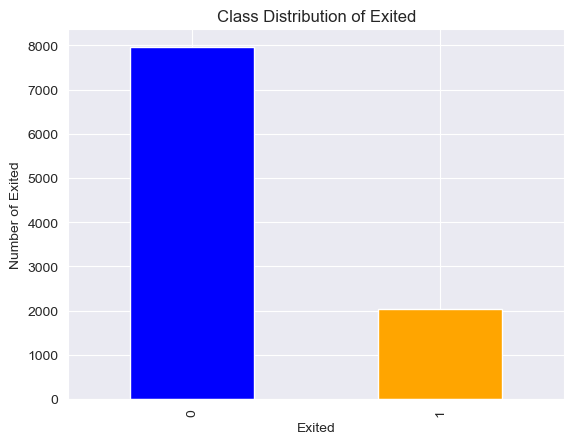

In [8]:
df['Exited'].value_counts().plot(kind='bar',color=['blue','orange'])
plt.title('Class Distribution of Exited')
plt.xlabel('Exited')
plt.ylabel('Number of Exited')
plt.show()

In [9]:
ratio = distribution_of_class[0]/distribution_of_class[1]
print(f'Imbalance ratio (0 : 1): {ratio:.2f} : 1')

Imbalance ratio (0 : 1): 3.91 : 1


------------------------------------------------------------------------------------
Data Preprocessing 

In [10]:
df.drop(['CustomerId','Surname','CustomerId.1'], axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [12]:
df['Gender'].unique()

array(['Female', 'Male', ' male', 'female'], dtype=object)

In [13]:
# Standardize the 'Gender' column by stripping spaces and capitalizing
df['Gender'] = df['Gender'].str.strip().str.capitalize()
# Verify the unique values
print(df['Gender'].unique())


['Female' 'Male']


In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,791,Germany,Female,35,7,52436.20,1,1,0,161051.75,0
1,705,Germany,Male,42,8,166685.92,2,1,1,55313.51,0
2,543,France,Female,31,4,138317.94,1,0,0,61843.73,0
3,709,France,Female,32,2,0.00,2,0,0,109681.29,0
4,714,Germany,Female,36,1,101609.01,2,1,1,447.73,0


In [15]:
df['Geography'].unique()

array(['Germany', 'France', 'Spain'], dtype=object)

In [16]:
label_encoder = LabelEncoder()
label_encoder

LabelEncoder()

In [17]:
label_encoder.fit(df['Gender'])

LabelEncoder()

In [18]:
# Check label mapping (normally in alphabetical order)
label_encoder.classes_

array(['Female', 'Male'], dtype=object)

In [19]:
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Gender'].head()

0    0
1    1
2    0
3    0
4    0
Name: Gender, dtype: int32

In [20]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,791,Germany,0,35,7,52436.20,1,1,0,161051.75,0
1,705,Germany,1,42,8,166685.92,2,1,1,55313.51,0
2,543,France,0,31,4,138317.94,1,0,0,61843.73,0
3,709,France,0,32,2,0.00,2,0,0,109681.29,0
4,714,Germany,0,36,1,101609.01,2,1,1,447.73,0


In [21]:
onehot_encoder = OneHotEncoder(sparse_output=False,)
onehot_encoder

OneHotEncoder(sparse_output=False)

In [22]:
df['Geography'].unique()

array(['Germany', 'France', 'Spain'], dtype=object)

In [23]:
geography_encoded = onehot_encoder.fit_transform(df[['Geography']])
geography_encoded

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [24]:
new_columns_names = onehot_encoder.get_feature_names_out()
new_columns_names

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [25]:
df = df.copy()

In [26]:
df[new_columns_names] = geography_encoded.astype(int)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,791,Germany,0,35,7,52436.20,1,1,0,161051.75,0,0,1,0
1,705,Germany,1,42,8,166685.92,2,1,1,55313.51,0,0,1,0
2,543,France,0,31,4,138317.94,1,0,0,61843.73,0,1,0,0
3,709,France,0,32,2,0.00,2,0,0,109681.29,0,1,0,0
4,714,Germany,0,36,1,101609.01,2,1,1,447.73,0,0,1,0


In [27]:
df.drop('Geography', axis=1, inplace=True)

In [28]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,791,0,35,7,52436.20,1,1,0,161051.75,0,0,1,0
1,705,1,42,8,166685.92,2,1,1,55313.51,0,0,1,0
2,543,0,31,4,138317.94,1,0,0,61843.73,0,1,0,0
3,709,0,32,2,0.00,2,0,0,109681.29,0,1,0,0
4,714,0,36,1,101609.01,2,1,1,447.73,0,0,1,0


In [29]:
df.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.250900,0.247700
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.433553,0.431698
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


In [30]:
mapping = {}

# Encode the categorical variables
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    mapping[col] = dict(zip(le.classes_, le.transform(le.classes_)))
    print(col, ': ', le.classes_)

In [31]:
X = df.drop(['Exited'], axis=1)
y = df['Exited']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [33]:
classifiers = {
    'LogisticRegression': (LogisticRegression(), {
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear'],
        'max_iter': [100, 200, 300]
    }),
    'KNeighbors': (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan'],
        'p': [1, 2]
    }),
    'NaiveBayes': (GaussianNB(), {
        'var_smoothing': [1e-9, 1e-8, 1e-7]
    }),
        'SVM': (SVC(), {
        'C': [10, 100],
        'degree': [2, 3, 4]
    }),
}

In [34]:

# scoring metrics
scoring = {'accuracy': 'accuracy',
           'precision': 'precision_weighted',
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}


In [35]:
smote = SMOTE(random_state=42)

In [36]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [37]:
best_models = {}
for classifier_name, (classifier, params) in classifiers.items():
    print(f"Training {classifier_name}...")
    
    # Create GridSearchCV
    grid_search = GridSearchCV(estimator=classifier, param_grid=params, 
                               cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), 
                               scoring='accuracy', refit=True, verbose=1, n_jobs=-1)
    
    # Fit GridSearchCV with resampled training data
    grid_search.fit(X_train_resampled, y_train_resampled)
    
    # Save the best model
    best_models[classifier_name] = grid_search.best_estimator_
    
    # Print the best parameters and accuracy
    print(f"Best Parameters for {classifier_name}: {grid_search.best_params_}")
    print(f"Best Accuracy for {classifier_name}: {grid_search.best_score_:.4f}\n")


Training LogisticRegression...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters for LogisticRegression: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy for LogisticRegression: 0.8258

Training KNeighbors...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters for KNeighbors: {'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best Accuracy for KNeighbors: 0.7185

Training NaiveBayes...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters for NaiveBayes: {'var_smoothing': 1e-09}
Best Accuracy for NaiveBayes: 0.7322

Training SVM...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters for SVM: {'C': 100, 'degree': 2}
Best Accuracy for SVM: 0.5659



In [38]:
for classifier_name, best_model in best_models.items():
    print(f"Evaluating {classifier_name} on the test set...")
    
    y_pred = best_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    print(f"Test Accuracy for {classifier_name}: {accuracy:.4f}")
    print(f"Test F1 Score for {classifier_name}: {f1:.4f}")
    print(f"Test Precision for {classifier_name}: {precision:.4f}")
    print(f"Test Recall for {classifier_name}: {recall:.4f}\n")

Evaluating LogisticRegression on the test set...
Test Accuracy for LogisticRegression: 0.7633
Test F1 Score for LogisticRegression: 0.7663
Test Precision for LogisticRegression: 0.7697
Test Recall for LogisticRegression: 0.7633

Evaluating KNeighbors on the test set...
Test Accuracy for KNeighbors: 0.5877
Test F1 Score for KNeighbors: 0.6233
Test Precision for KNeighbors: 0.6845
Test Recall for KNeighbors: 0.5877

Evaluating NaiveBayes on the test set...
Test Accuracy for NaiveBayes: 0.6730
Test F1 Score for NaiveBayes: 0.7035
Test Precision for NaiveBayes: 0.7841
Test Recall for NaiveBayes: 0.6730

Evaluating SVM on the test set...
Test Accuracy for SVM: 0.4807
Test F1 Score for SVM: 0.5214
Test Precision for SVM: 0.7298
Test Recall for SVM: 0.4807



In [39]:
# best_logreg = best_models['LogisticRegression']
# y_pred = best_logreg.predict(X_scaled)
# cm = confusion_matrix(y, y_pred)

In [40]:
# # Plot Confusion Matrix
# plt.figure(figsize=(6, 4))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix - Logistic Regression')
# plt.show()